In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('derived_data/train_data_merged_2016.csv')

In [3]:
df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [4]:
df.shape

(90275, 60)

# Check the Transaction Date Range¶


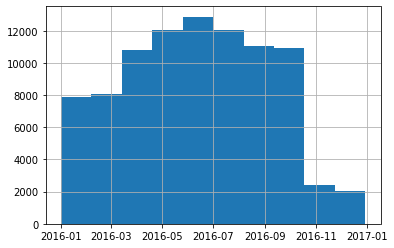

In [5]:
pd.to_datetime(df.transactiondate).hist()

In [6]:
pd.to_datetime(df.transactiondate).min()

Timestamp('2016-01-01 00:00:00')

In [7]:
pd.to_datetime(df.transactiondate).max()

Timestamp('2016-12-30 00:00:00')

# Check for Duplicate Parcels

In [8]:
# is there one record per parcel? 
df.parcelid.nunique() == len(df)

False

In [9]:
# lets look at some of the ones that have multiple records
counts_per_parcel = df.groupby('parcelid').size()
more_than_one_sale = df[df.parcelid.isin(counts_per_parcel[counts_per_parcel > 1].index)]
only_one_sale = df[df.parcelid.isin(counts_per_parcel[counts_per_parcel == 1].index)]

# there asre 249 of them
print(more_than_one_sale.parcelid.nunique())

# and lets take a look at them
more_than_one_sale.head(10)

124


,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
496,13850164,-0.1567,2016-01-05,13.0,NaN,NaN,2.0,3.0,NaN,NaN,...,1.0,NaN,76740.0,260828.0,2015.0,184088.0,3079.84,NaN,NaN,6.059001e+13
497,13850164,-0.0460,2016-06-29,13.0,NaN,NaN,2.0,3.0,NaN,NaN,...,1.0,NaN,76740.0,260828.0,2015.0,184088.0,3079.84,NaN,NaN,6.059001e+13
781,14677191,-0.3682,2016-01-06,1.0,NaN,NaN,2.0,2.0,NaN,NaN,...,1.0,NaN,95488.0,234504.0,2015.0,139016.0,2467.90,NaN,NaN,6.059063e+13
782,14677191,-0.0845,2016-09-12,1.0,NaN,NaN,2.0,2.0,NaN,NaN,...,1.0,NaN,95488.0,234504.0,2015.0,139016.0,2467.90,NaN,NaN,6.059063e+13
813,11005771,-0.0131,2016-01-06,NaN,NaN,NaN,2.0,5.0,NaN,4.0,...,NaN,NaN,56889.0,75221.0,2015.0,18332.0,1134.10,NaN,NaN,6.037101e+13
814,11005771,0.0545,2016-06-17,NaN,NaN,NaN,2.0,5.0,NaN,4.0,...,NaN,NaN,56889.0,75221.0,2015.0,18332.0,1134.10,NaN,NaN,6.037101e+13
967,11183209,-0.0481,2016-01-07,1.0,NaN,NaN,3.0,4.0,NaN,4.0,...,NaN,NaN,222215.0,275555.0,2015.0,53340.0,4375.10,NaN,NaN,6.037910e+13
968,11183209,-0.0070,2016-09-14,1.0,NaN,NaN,3.0,4.0,NaN,4.0,...,NaN,NaN,222215.0,275555.0,2015.0,53340.0,4375.10,NaN,NaN,6.037910e+13
1164,11554091,-0.1696,2016-01-07,NaN,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,208376.0,437155.0,2015.0,228779.0,5448.05,NaN,NaN,6.037272e+13
1165,11554091,-0.0954,2016-07-05,NaN,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,208376.0,437155.0,2015.0,228779.0,5448.05,NaN,NaN,6.037272e+13


It appears that some homes were sold twice during the period that the training data was captured. We have a few options here, and it's just as imporatant to discuss the tradeoffs between them as choosing the "right" one (and there usually is no "right" one).

We know that we don't want the model to overweight properties that have more than one record because we want it to perform well on our holdout set. On the other hand, there is valuable information in knowing that the only difference between two records (besides our target variable) is the date field.

So for constructing the dataset for training our model, we could:

Use the most recent sales record
Use the oldest sales record
Use both sales records
Use a random sales record
Engineer a feature from the information contained, and then choose one of the above
Note that only a hundred or so of the 90,000ish properties have multiple sales records, so it probably isn't a big deal whatever we choose, so lets go with a simple solution for now, which is taking a random sale record for each parcel with more than one sale record.

In [10]:
# first ensure we've accurately separated the records
assert len(df) == (len(more_than_one_sale) + len(only_one_sale))

# then remove the duplicate records by choosing a random sale from properties with more than one
reduced_df = more_than_one_sale.sample(frac=1, random_state=0).groupby('parcelid').head(1)
reduced_df = pd.concat([only_one_sale, reduced_df])

In [11]:
# and check if the same parcel IDs exist in the original data as the reduced data
assert set(reduced_df.parcelid) == set(df.parcelid)

In [12]:
reduced_df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


Now lets take the logic we defined above and package it into a function called filter_duplicate_parcels:

In [13]:
import sys
sys.path.insert(0, './scripts')
# now read in the function
from helpers import filter_duplicate_parcels
import inspect
print(inspect.getsource(filter_duplicate_parcels))

def filter_duplicate_parcels(df, random_state=0):
    """filter the merged train and properties datasets to only include one record per parcel.
    
    Intended only for use on the training data for building the model
    Keyword arguments:
    df -- the result of `merge_dataset`
    random_state -- the random seed to be passed to the `pandas.DataFrame.sample()` method
    
    Returns:
    a pandas dataframe
    """
 
    counts_per_parcel = df.groupby('parcelid').size()
    more_than_one_sale = df[df.parcelid.isin(counts_per_parcel[counts_per_parcel > 1].index)]
    only_one_sale = df[df.parcelid.isin(counts_per_parcel[counts_per_parcel == 1].index)]
    reduced_df = more_than_one_sale.sample(frac=1, random_state=random_state).groupby('parcelid').head(1)
    reduced_df = pd.concat([only_one_sale, reduced_df])
    
    return reduced_df



# Explore Null Values

Null values can be a blessing and a curse. They are difficult to deal with at times, but they also can contain valuable information. Some data scientists make the mistake of throwing out any columns with Null values because Machine Learning algorithms will complain about them. A better approach would be to encode them in a way that your algorithm can understand. This can be tough with linear methods, but much easier with nonlinear methods like trees or neural nets.

In [14]:
reduced_df.isnull().sum().sort_values(ascending=False).head(20)

buildingclasstypeid         90134
finishedsquarefeet13        90117
basementsqft                90107
storytypeid                 90107
yardbuildingsqft26          90055
fireplaceflag               89930
architecturalstyletypeid    89890
typeconstructiontypeid      89852
finishedsquarefeet6         89731
decktypeid                  89492
poolsizesum                 89184
pooltypeid10                88991
pooltypeid2                 88946
taxdelinquencyyear          88375
taxdelinquencyflag          88375
hashottuborspa              87787
yardbuildingsqft17          87505
finishedsquarefeet15        86595
finishedsquarefeet50        83300
finishedfloor1squarefeet    83300
dtype: int64

In [15]:
reduced_df.isnull().sum().sort_values(ascending=True).head(20)

parcelid                        0
longitude                       0
propertylandusetypeid           0
rawcensustractandblock          0
regionidcounty                  0
roomcnt                         0
latitude                        0
fips                            0
bathroomcnt                     0
assessmentyear                  0
transactiondate                 0
logerror                        0
bedroomcnt                      0
taxvaluedollarcnt               1
landtaxvaluedollarcnt           1
propertycountylandusecode       1
taxamount                       6
regionidzip                    35
structuretaxvaluedollarcnt    378
censustractandblock           603
dtype: int64

# Explore Unique Values

Here we're looking for a couple things:

Are any of the features all the same value? This wouldn't be very useful in a model, so throw them out.
Are any of the features discrete with high cardinality? These wouldn't hold very much information because there would only be a handful of records for each "level" of the categorical feature

In [16]:
reduced_df.nunique().sort_values(ascending=False).head(30)

parcelid                        90150
taxamount                       85110
latitude                        73312
longitude                       71900
landtaxvaluedollarcnt           57066
taxvaluedollarcnt               55938
structuretaxvaluedollarcnt      55450
rawcensustractandblock          42643
censustractandblock             42398
lotsizesquarefeet               20016
calculatedfinishedsquarefeet     5102
finishedsquarefeet12             4982
propertyzoningdesc               1996
finishedsquarefeet15             1915
finishedsquarefeet50             1898
logerror                         1893
finishedfloor1squarefeet         1886
garagetotalsqft                   870
yardbuildingsqft17                567
regionidneighborhood              494
regionidzip                       388
finishedsquarefeet6               360
transactiondate                   352
poolsizesum                       273
regionidcity                      177
yearbuilt                         130
propertycoun

Variables with High Cardinality to watch out for:

rawcensustractandblock
censustractandblock
propertyzoningdesc
regionidneighborhood
regionidzip

In [17]:
reduced_df.nunique(dropna=False).sort_values(ascending=True).head(20)

assessmentyear              1
poolcnt                     2
storytypeid                 2
fireplaceflag               2
pooltypeid7                 2
pooltypeid2                 2
buildingclasstypeid         2
pooltypeid10                2
decktypeid                  2
taxdelinquencyflag          2
hashottuborspa              2
regionidcounty              3
fips                        3
typeconstructiontypeid      4
threequarterbathnbr         5
numberofstories             5
fireplacecnt                6
airconditioningtypeid       7
architecturalstyletypeid    7
buildingqualitytypeid       9
dtype: int64

Notice that assessmentyear has only one unique value.

# Inspect the Target Variable

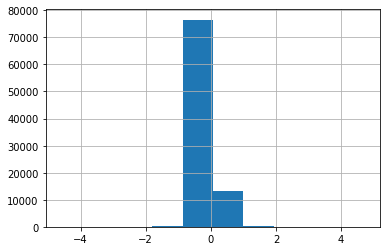

In [18]:
reduced_df.logerror.hist()

So the Target looks a bit like a Laplace Distribution. We should keep that in mind as we choose ML Algorithms and corresponding loss functions. If we plot the density on a log-scale, the target looks closer to a Normal Distribution.

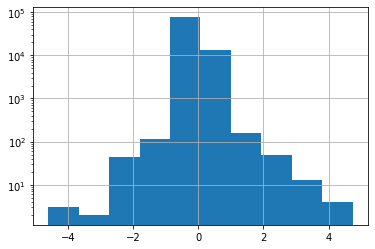

In [19]:
fig, ax = plt.subplots()
reduced_df.logerror.hist(ax=ax)
ax.set_yscale('log')